## 영상정보처리 4주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 5점 
- 문제2: 5점
- 기존 문제 3번 삭제  

이름: 이상민           
학번: 32153180

이미지를 컬러로 잃기 
동일 크기의 그레이스케일 공 이미지 만들기
컬러 이미지의 각 픽셀의 RGB 값을 이용하여 grayscale 값으로 만들어서 그레이스케일 이미지의 동일자리에 배정하기 -> 그레이스케일 이미지 만들기
새로운 컬러 공 이미지를 만들고, 그레이스케일 이미지 값을 참조하여 화소값을 채운 후 출력하시오


In [1]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My\ Drive/ImageProcClass/Week4
%ls

/gdrive/My Drive/ImageProcClass/Week4
2020-2-ImgProc-HW4-이상민-32153180.ipynb  2020-2-ImgProc-HW4-Template.ipynb


Souce image 는 다음의 image_path 를 변경하지 말고 이용할 것. 경로가 다른 경우 감점 -3

In [3]:
image_path = '../Dongkeun-OpenCV-ImgData/logo.png' 

## 문제 1: 부분 이미지릉 이용한 이미지 생성

1. 위의 이미지 경로를 이용하여 이미지를 컬러 이미지 org_image 로 읽기
2. 읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기 
3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기 
  - x 축값이 4등분하여 4개의 영역이 동일 크기가 되지 않는 경우, 맨 오른쪽 영역에는 남는 크기 배분
  - subimage 1: 동일 영역에 해당하는 org_image 부분 복사하기 
  - subimage 2: 동일 영역에 해당하는 org_image 부분에서 Red 성분만 복사하고, green/blue 부분은 0으로 하여 subimage 2에 채워 넣을 것
  - subimage 3: 동일 영역에 해당하는 org_image 부분에서 Blue 성분만 복사하고, green/red 부분은 0으로 하여 subimage 3에 채워 넣을 것
  - subimage 4: 동일 영역에 해당하는 org_image 부분에서 Green 성분만 복사하고, blue/red 부분은 0으로 하여 subimage 4에 채워 넣을 것

4. new_image1 을 디스플레이하기 

org_image shape : (600, 487, 3)
width : 487 / height : 600


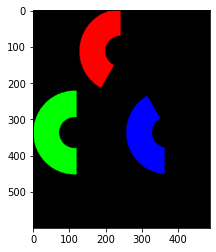

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

org_image = cv2.imread(image_path)

# org_image BGR -> RGB
b, g, r = cv2.split(org_image)
org_image = cv2.merge([r, g, b])

print('org_image shape :', org_image.shape)
h, w, _ = org_image.shape
print('width : {} / height : {}'.format(w, h))

new_image1 = np.zeros((h, w, 3), np.uint8)

base = int(w/4)
start, end = 0, base-1
seq = []

# seq 리스트에 4등분한 영역의 start, end 값 저장
for i in range(4):
  if i == 3:
    end = 487
  seq.append((start, end))
  start += base
  end += base

# 복사해야할 채널의 성분 저장
# 왼쪽부터 subimage1, subimage2, subimage3, subimage4
# subimage1 - 모든 성분 복사
# subimage2 - RED만 복사 (0)
# subimage3 - BLUE만 복사 (2)
# subimage4 - GREEN만 복사 (1)
channel = [_, 0, 2, 1]
for i in range(4):
  # subimage1
  if i == 0:
    for j in range(3):
      new_image1[:, seq[i][0]:seq[i][1], j] = org_image[:, seq[i][0]:seq[i][1], j]
    continue
    
  # subimage2, subimage3, subimage4
  for k in range(3):
    if k == channel[i]:
      new_image1[:, seq[i][0]:seq[i][1], k] = org_image[:, seq[i][0]:seq[i][1], k]
    else:
      new_image1[:, seq[i][0]:seq[i][1], k] = 0

plt.imshow(new_image1)
plt.show()

## 문제 2: 식을 이용한 grayscale 이미지 만들기 

1. org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
2. org_image 의 각 화소를 접근하여 강의에서 설명한 공식을 사용하여 grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
2. new_image2 디스플레이하기 

[참조] https://stackoverflow.com/questions/17615963/standard-rgb-to-grayscale-conversion



new_image2 shape : (600, 487)


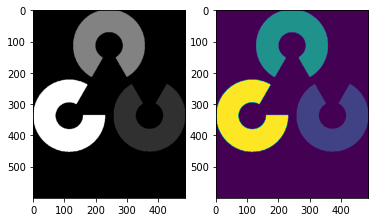

In [28]:
import math

# org_image와 같은 크기의 공백 이미지(new_image2) 생성
new_image2 = np.zeros((h, w), np.uint8)
print('new_image2 shape :', new_image2.shape)

# 1번 문제에서 org_image 채널 순서를 RGB로 바꿨음
for i in range(h):
  for j in range(w):
    r, g, b = org_image[i, j, 0], org_image[i, j, 1], org_image[i, j, 2]
    gray = 0.299*r + 0.587*g + 0.114*b
    # 각 화소마다 grayscale 값으로 변환
    new_image2[i, j] = gray

# cmap="gray" 옵션을 준 경우
plt.subplot(121)
plt.imshow(new_image2, cmap="gray")
plt.subplot(122)

# cmap="gray" 옵션을 주지 않은 경우
# grayscale 이미지를 제대로 읽지 못함
plt.imshow(new_image2)
plt.show()